In [1]:
import sys
from pathlib import Path

# Ensure project root is on sys.path
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

import numpy as np
import matplotlib.pyplot as plt

from src.models import qm_correlation_exact, chsh, chsh_standard_angles


# Noise and Realism: When Does Bell Violation Disappear?

## Aim
Real systems are not perfectly isolated, so entangled correlations are reduced by noise.
This notebook studies how Bell–CHSH violation changes as noise increases.

We use a simple "visibility" noise model:

$$
E_V(\theta) = V \, E_{\mathrm{QM}}(\theta)
$$

where
- $E_{\mathrm{QM}}(\theta) = -\cos\theta$ is the ideal singlet correlation,
- $0 \le V \le 1$ is the *visibility* (a measure of how strong the correlations remain).

We compute the CHSH parameter:

$$
S(V) = E_V(a,b)+E_V(a,b')+E_V(a',b)-E_V(a',b')
$$

and find the threshold visibility at which the Bell inequality is no longer violated:

$$
|S(V)| \le 2.
$$


In [2]:
a, ap, b, bp = chsh_standard_angles()

def S_visibility(V: float) -> float:
    # Noisy correlation model: E_V = V * E_QM
    E_ab   = V * qm_correlation_exact(a, b)
    E_abp  = V * qm_correlation_exact(a, bp)
    E_apb  = V * qm_correlation_exact(ap, b)
    E_apbp = V * qm_correlation_exact(ap, bp)
    return chsh(E_ab, E_abp, E_apb, E_apbp)

# sanity check
S_visibility(1.0), S_visibility(0.0)


(-2.8284271247461903, -0.0)

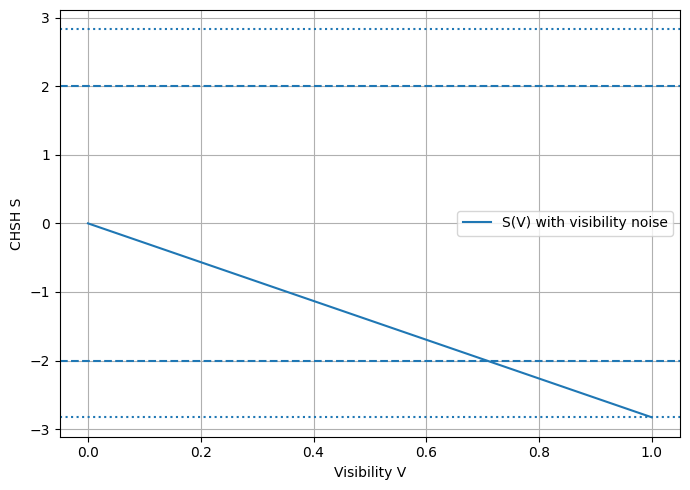

In [3]:
Vs = np.linspace(0, 1, 101)
Svals = np.array([S_visibility(V) for V in Vs])

plt.figure(figsize=(7,5))
plt.plot(Vs, Svals, label='S(V) with visibility noise')
plt.axhline(2.0, linestyle='--')
plt.axhline(-2.0, linestyle='--')
plt.axhline(2*np.sqrt(2), linestyle=':')
plt.axhline(-2*np.sqrt(2), linestyle=':')

plt.xlabel("Visibility V")
plt.ylabel("CHSH S")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("../figures/S_vs_visibility.png", dpi=200)
plt.show()


In [4]:
V_crit_theory = 1/np.sqrt(2)

# numerical estimate from sampled grid
mask = np.abs(Svals) > 2
V_crit_num = Vs[mask][-1] if np.any(mask) else None

V_crit_theory, V_crit_num


(np.float64(0.7071067811865475), np.float64(1.0))

## Interpretation

- Visibility $V$ reduces correlations linearly: $E_V(\theta)=V\,E_{\mathrm{QM}}(\theta)$.
- Therefore the CHSH parameter scales as:
  $$
  S(V) = V\,S(1).
  $$
- Since the ideal quantum value is $|S(1)| = 2\sqrt{2}$, violation disappears when:
  $$
  V \le \frac{1}{\sqrt{2}} \approx 0.707.
  $$
- This gives a clear physical meaning: if noise reduces correlation strength below ~70.7% of the ideal value, Bell–CHSH violation is no longer observable.
